# <p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:200%;text-align:center;border-radius:10px 10px;">Customer personality analiysis</p>

<img src="https://raw.githubusercontent.com/meafekih/images/master/customer_personality.png">

In this project, 

<a id='top'></a>
<p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>

       
* [1. ABOUT DATASET](#1)
    
    
* [2. IMPORTING LIBRARIES & LOADING DATA](#2)

    
* [3. DATA CLEANING & DATA PREPROCESSING](#3)
 
    
* [4. DIMENSIONALITY REDUCTION & CLUSTERING](#4) 
      
    
* [5. EVALUATING MODELS](#5)
    
    
* [6. CONCLUSION](#6)

# <a id="1"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">ABOUT DATASET</p>


## Context

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. 

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


## Content

**Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month

## Target

<h3>Need to perform clustering to summarize customer segments.</h3>

# <a id="2"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES & LOADING DATA</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)
style.use("fivethirtyeight")
style.use('seaborn-poster')
plt.rcParams['font.family'] = 'sans-serif'

%matplotlib inline

In [2]:
customer = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
"""

"\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\ndata = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep='\t')\n"

# <a id="3"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">DATA CLEANING & DATA PREPROCESSING</p>

In [4]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
for col in customer.columns:
    if (customer[col].dtypes == "object"):
        print(f'Columns: {col} is Object type')
    if (customer[col].nunique()==1):
        customer = customer.drop(col, axis = 1)
        print(f'Column: {col} is dropped')

Columns: Education is Object type
Columns: Marital_Status is Object type
Columns: Dt_Customer is Object type
Column: Z_CostContact is dropped
Column: Z_Revenue is dropped


In [6]:
# convert
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])

In [7]:
# missing Values
missing = customer.isnull().sum().sort_values(ascending=False)
missing = missing[missing>0]
rows = customer.shape[0]; cols= customer.shape[1]
print(f'Data have: {rows} rows and {cols} columns')
print(f'Column {missing.index[0]} : having {missing.values[0]} missing values, with {round((missing.values[0]/rows)*100,2)}%')

Data have: 2240 rows and 27 columns
Column Income : having 24 missing values, with 1.07%


In [8]:
# Droping missing values
customer = customer.dropna()
# or fill missing values with mean: customer.fillna(customer.Income.mean(),inplace=True)

In [9]:
# Dublicate rows
customer.duplicated().sum()
# There is not duplicate values

0

### Data preparation

In [10]:
import datetime as dt
customer['Age'] = 2015 - customer.Year_Birth

customer['Month_Customer'] = 12.0 * (2015 - customer.Dt_Customer.dt.year ) + (1 - customer.Dt_Customer.dt.month)
customer['TotalSpendings'] =  customer.MntWines + customer.MntFruits + customer.MntMeatProducts + customer.MntFishProducts + customer.MntSweetProducts + customer.MntGoldProds

customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 20) & (customer['Age']<= 39), 'AgeGroup'] = 'Adult'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer.loc[(customer['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

customer.Marital_Status = customer.Marital_Status.replace({'Together': 'Partner', 'Married': 'Partner',
                                                           'Divorced': 'Single', 'Widow': 'Single', 
                                                           'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'
                                                          })

customer.loc[(customer['Marital_Status'] == 'Partner'), 'nb_familly'] = customer.Kidhome + customer.Teenhome + 2
customer.loc[(customer['Marital_Status'] == 'Single'), 'nb_familly'] = customer.Kidhome + customer.Teenhome  + 1
customer["Total_Promos"] = customer["AcceptedCmp1"]+ customer["AcceptedCmp2"]+ customer["AcceptedCmp3"]+ customer["AcceptedCmp4"]+ customer["AcceptedCmp5"]
customer['NumTotalPurchases'] = customer['NumWebPurchases'] + customer['NumCatalogPurchases'] + customer['NumStorePurchases'] + customer['NumDealsPurchases']

In [11]:
# Droped unusefull data
cols_droped = ['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer',
             'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2',
            'Response', 'NumWebPurchases','NumWebPurchases','NumCatalogPurchases',
            'NumStorePurchases','NumDealsPurchases','NumWebVisitsMonth'
            ]
customer = customer.drop(cols_droped, axis = 1)

In [12]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)

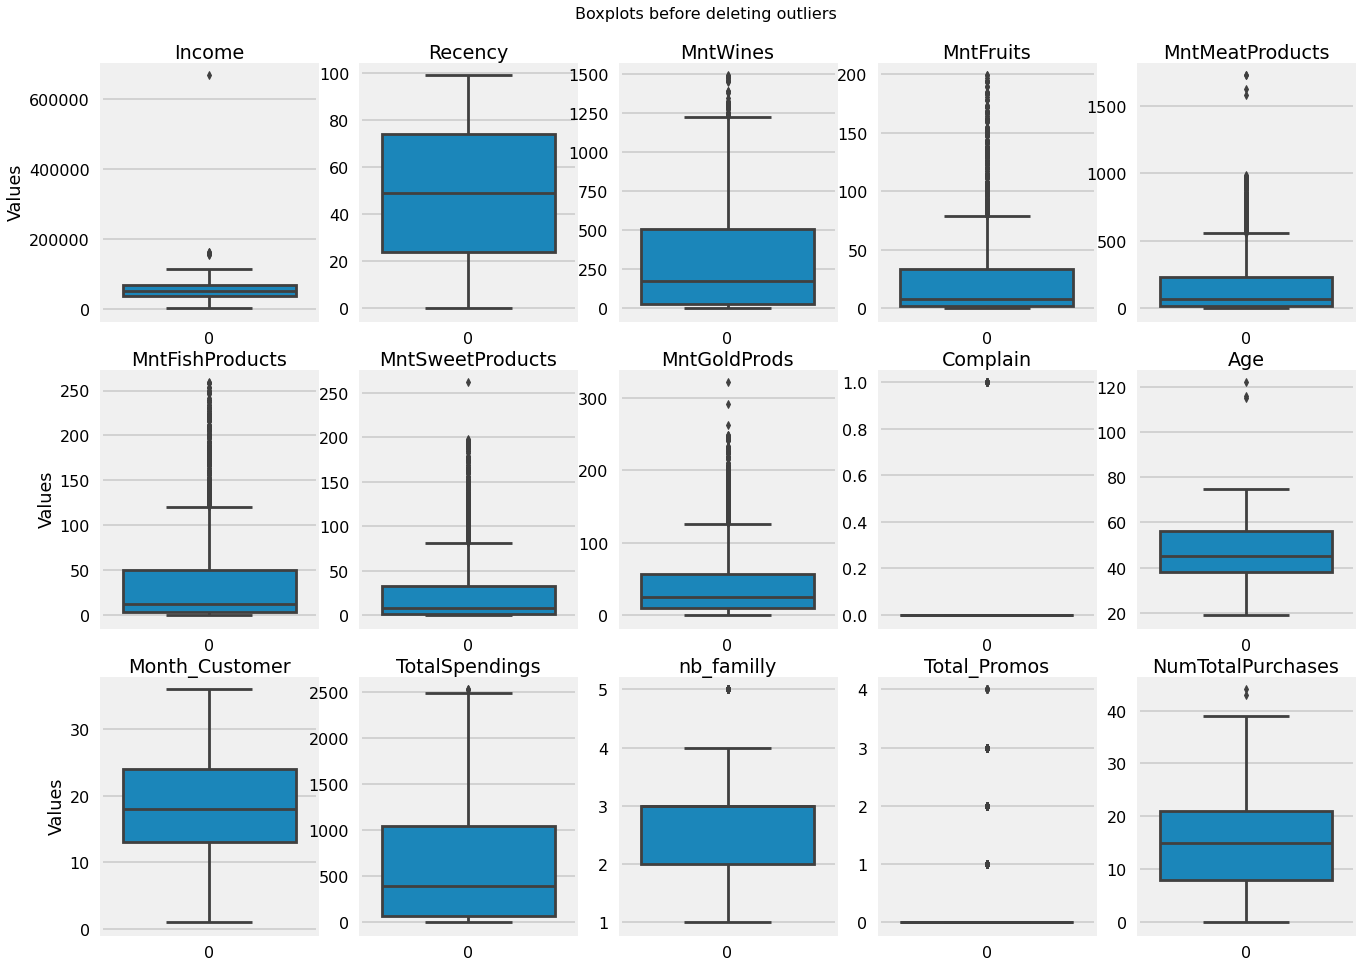

In [13]:
numerical_cols=['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'Complain', 'Age', 'Month_Customer', 'TotalSpendings',
                'nb_familly', 'Total_Promos', 'NumTotalPurchases']
                
boxplots_custom(dataset=customer, columns_list=numerical_cols, rows=3, cols=5, suptitle='Boxplots before deleting outliers')

In [14]:
cols_del_out =['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'Month_Customer', 'NumTotalPurchases']

Q1 = customer[cols_del_out].quantile(0.1)
Q3 = customer[cols_del_out].quantile(0.85)
IQR = Q3 - Q1
customer_f = customer[~((customer[cols_del_out] < (Q1 - 1.5 * IQR)) |(customer[cols_del_out] > (Q3 + 1.5 * IQR))).any(axis=1)]

pourcentage_deleting = round((customer.shape[0]-customer_f.shape[0])*100/customer.shape[0],2)
print(f'{pourcentage_deleting}% deleting from customer data')

6.36% deleting from customer data


### Label Encoding & Standardization 

# <a id="4"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION & CLUSTERING</p>

### Label Encoder & Standard Scaler

In [30]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

LE = LabelEncoder()
for col in customer_f.columns:
    if (customer_f[col].dtypes =="object"):
        #customer_f[col]=customer_f[[col]].apply(LE.fit_transform)
        customer_f[col]=LE.fit_transform(customer_f[col].astype(str))
#Scaling
scaler = StandardScaler()
scaler.fit(customer_f)
customer_f_s = pd.DataFrame(scaler.transform(customer_f),columns=customer_f.columns)

### PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(customer_f_s)
customer_f_s_pca = pd.DataFrame(pca.transform(customer_f_s), columns=(["col1","col2","col3","col4"]))
customer_f_s_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2075.0,4.312481e-17,2.549683,-3.456611,-2.244936,-0.863348,2.066714,7.778689
col2,2075.0,-7.640475e-17,1.417540,-3.567677,-1.085842,0.058699,0.862017,4.390200
col3,2075.0,6.666689e-17,1.320677,-2.394572,-1.099938,-0.554316,1.442715,2.923341
col4,2075.0,-2.862503e-17,1.131704,-4.830633,-0.637051,0.016149,0.632674,5.495825


<AxesSubplot:>

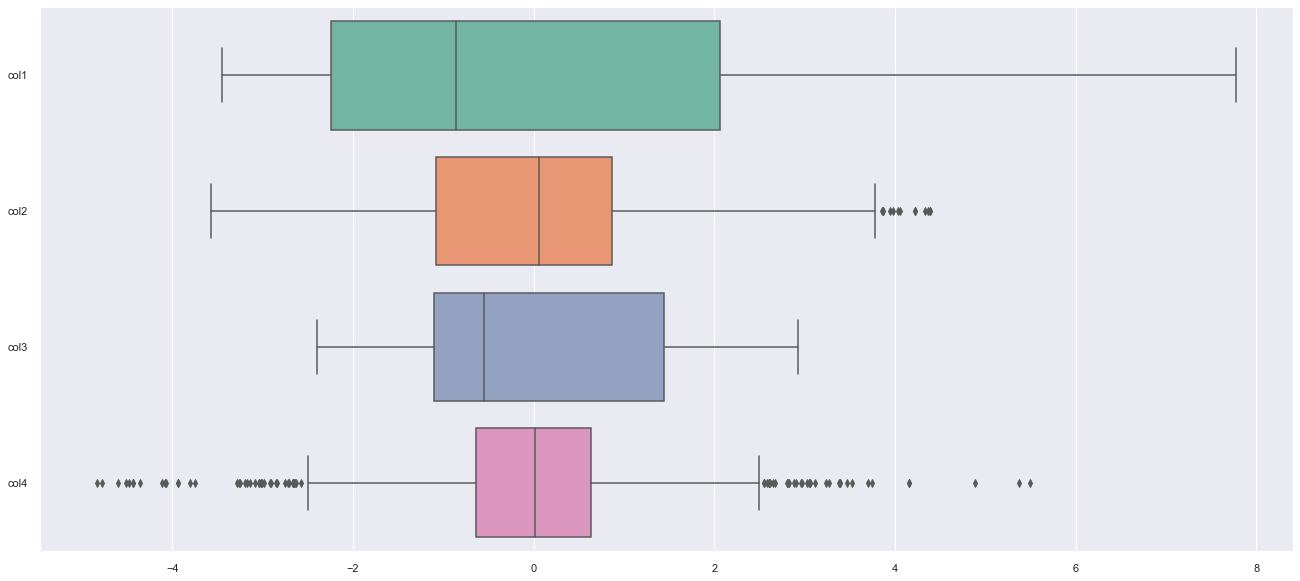

In [32]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data=customer_f_s_pca, orient="h", palette="Set2")

### KElbow

Elbow Method to determine the number of clusters to be formed:


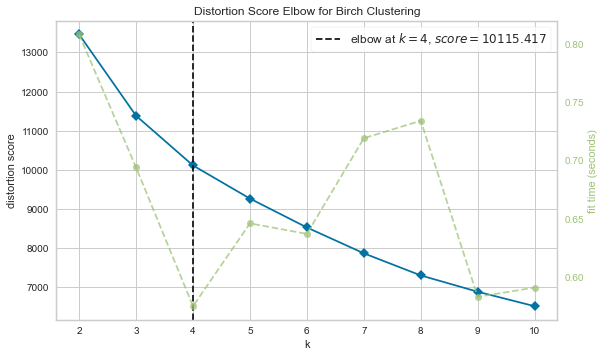

<AxesSubplot:title={'center':'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import Birch
BP = Birch(threshold=0.0001)

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(BP, k=10)
Elbow_M.fit(customer_f_s_pca)
Elbow_M.show()

In [19]:
#Initiating the Birch Clustering model with number ELBOW cluster
BP = Birch(threshold=0.0001, n_clusters=Elbow_M.elbow_value_)
# fit model and predict clusters
BP_customer_f_s_pca = BP.fit_predict(customer_f_s_pca)
#Adding the Clusters feature to the orignal dataframe.
customer_f["Clusters"]= BP_customer_f_s_pca

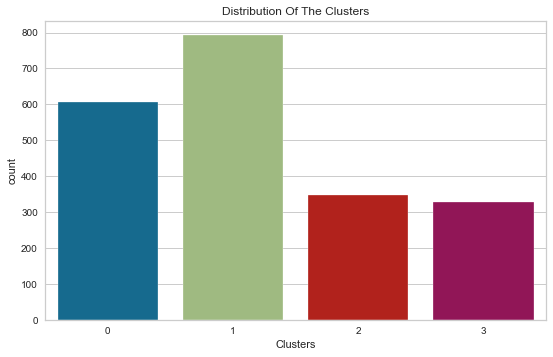

In [20]:
#Plotting countplot of clusters
import matplotlib.pyplot as plt
pl = sns.countplot(x=customer_f["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

# <a id="5"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">EVALUATING MODELS</p>

In [21]:
cols_analysis = ['Education', 'Marital_Status', 'Income', 'Recency',
                'Complain', 'Age', 'Month_Customer', 'TotalSpendings',
                'AgeGroup', 'nb_familly', 'Total_Promos', 'NumTotalPurchases']

customer_f_g = customer_f.groupby(['Clusters']).mean()

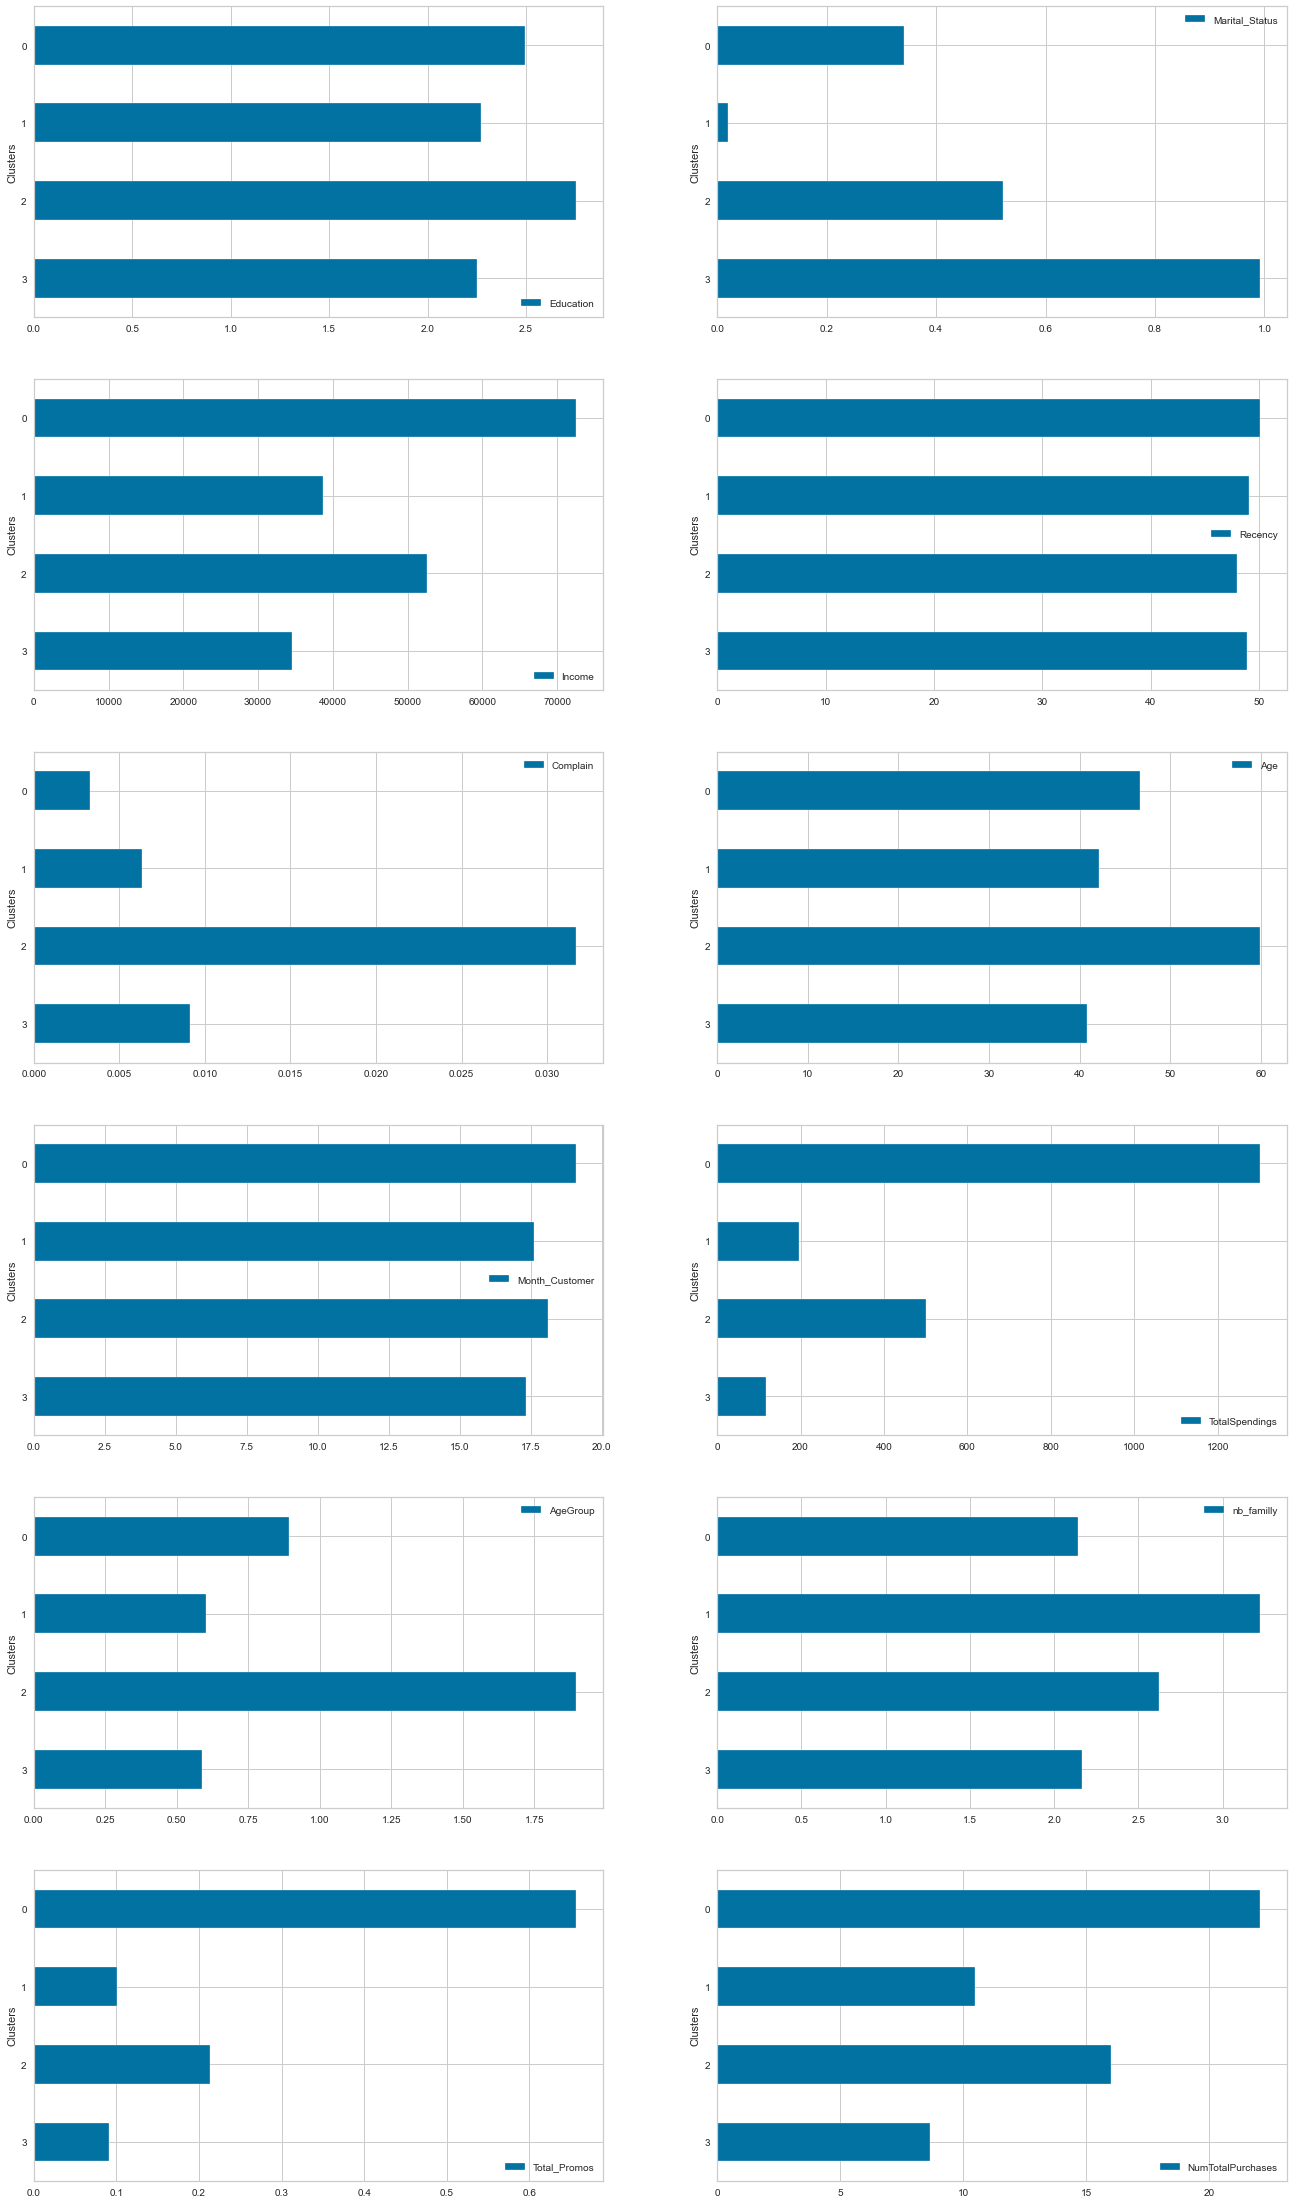

In [22]:
plts=[]

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 40))

for col in cols_analysis:
    plts.append(pd.DataFrame({col: customer_f_g[col]},
                index=customer_f_g.index).sort_values(by=['Clusters'],
                ascending=False))
    
indexes = [[0,0], [0,1], [1,0], [1,1], [2,0],
           [2,1], [3,0], [3,1], [4,0],[4,1], [5,0],[5,1]]
for ind, pl in enumerate(plts):
    pl.plot.barh(stacked=True, ax=axes[indexes[ind][0], indexes[ind][1]])


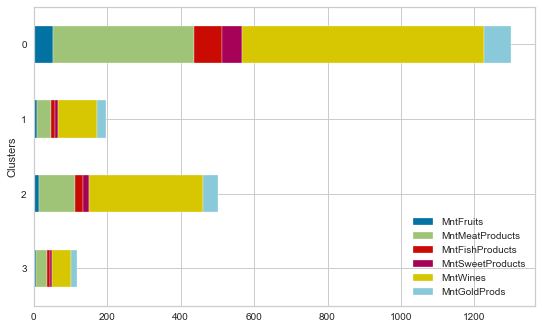

In [23]:
pl3 = pd.DataFrame({'MntFruits': customer_f_g.MntFruits, 'MntMeatProducts': customer_f_g.MntMeatProducts,
                   'MntFishProducts': customer_f_g.MntFishProducts,'MntSweetProducts': customer_f_g.MntSweetProducts,           'MntWines' : customer_f_g.MntWines,
                   'MntGoldProds' : customer_f_g.MntGoldProds},
                   index=customer_f_g.index).sort_values(by=['Clusters'], ascending=False)
pl3 = pl3.plot.barh(stacked=True)

# <a id="6"></a><p style="background-color:#FFF9ED;font-family:arial;color:#7e17b9;border-style:solid;font-size:100%;text-align:center;border-radius:10px 10px;">CONCLUSION</p>